#### Problem : Predict behavior to retain customers. To analyze all relevant customer data and develop focused customer retention programs.

In [59]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_column",None)
pd.set_option("display.max_rows",None)

## #Loading Dataset

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# df.set_index("customerID")

In [6]:
df.shape

(7043, 21)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['Churn'].value_counts()[0]

5174

In [11]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [12]:
# print("Percentage of NO: ",(df['Churn'].value_counts()[0]/df["Churn"].count())*100)
# print("Percentage of YES: ",(df['Churn'].value_counts()[1]/df["Churn"].count())*100)

In [13]:
print("NUMBER OF CHURNS (%):\n",df["Churn"].value_counts(normalize=True).map("{:.2%}".format))

NUMBER OF CHURNS (%):
 No     73.46%
Yes    26.54%
Name: Churn, dtype: object


In [14]:
for col in df.columns:
    print(col,":",df[col].unique())
    print("")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

SeniorCitizen : [0 1]

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Maile

## #Exploratory Data Analysis


<AxesSubplot:xlabel='Churn', ylabel='count'>

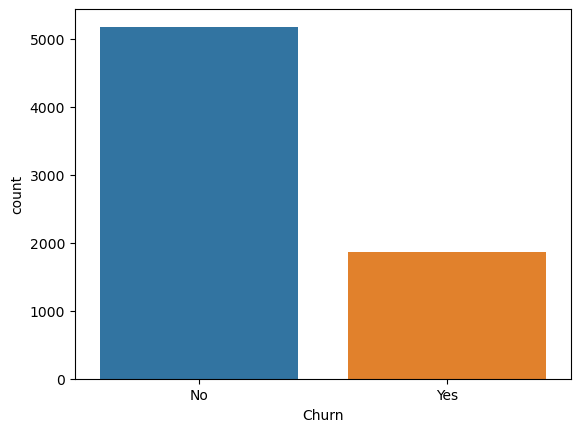

In [15]:
sns.countplot(data=df,x="Churn")


Imbalanced label Dataset

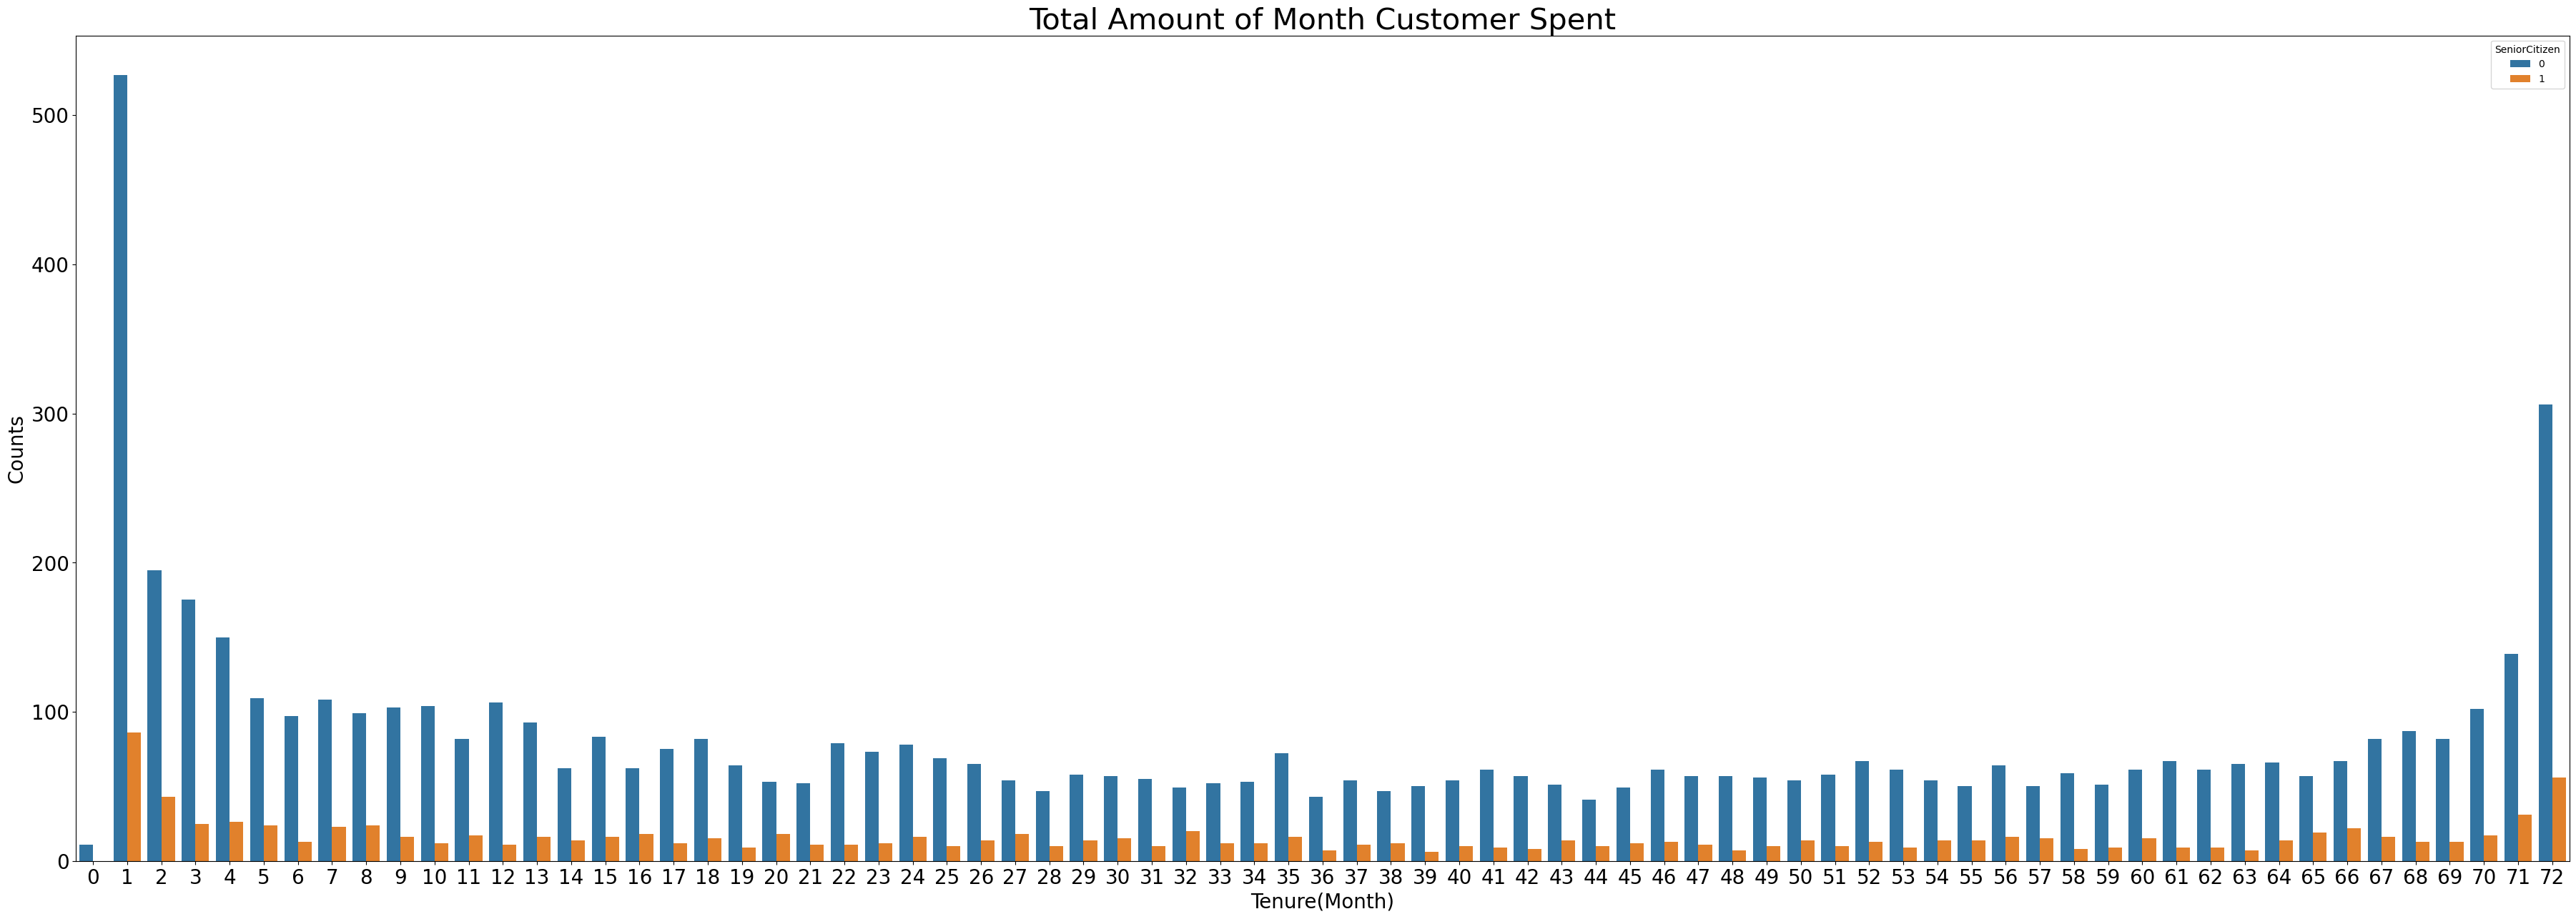

In [16]:
plt.figure(figsize=(45,15))
sns.countplot(data=df,x='tenure',hue="SeniorCitizen")
plt.title("Total Amount of Month Customer Spent",fontdict={'fontsize': 30,
        'fontweight': 10})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Tenure(Month)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.show()

In [17]:
# plt.figure(figsize=(40,50))
# sns.histplot(data=df, x="TotalCharges")
# plt.show()

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

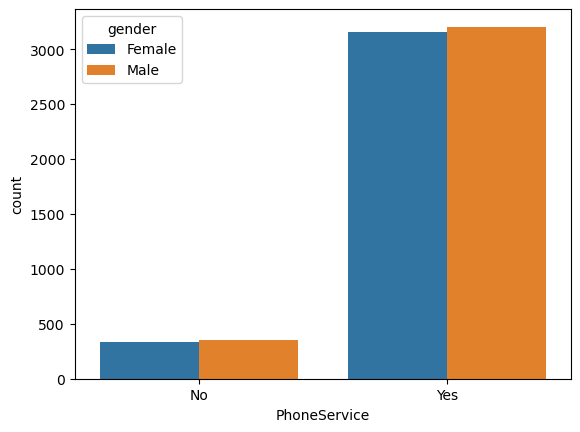

In [18]:
sns.countplot(data=df,x="PhoneService",hue="gender")

<AxesSubplot:xlabel='gender', ylabel='count'>

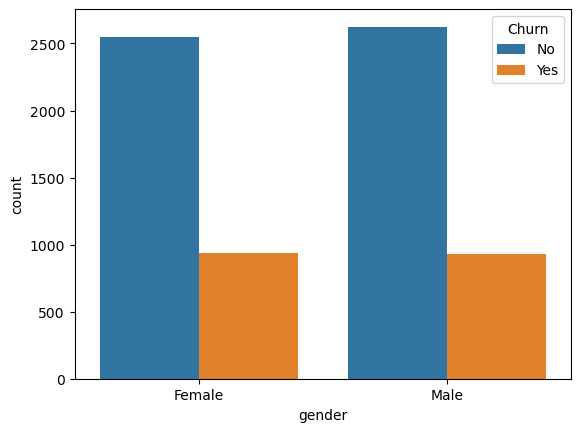

In [19]:
sns.countplot(data=df,x="gender",hue="Churn")

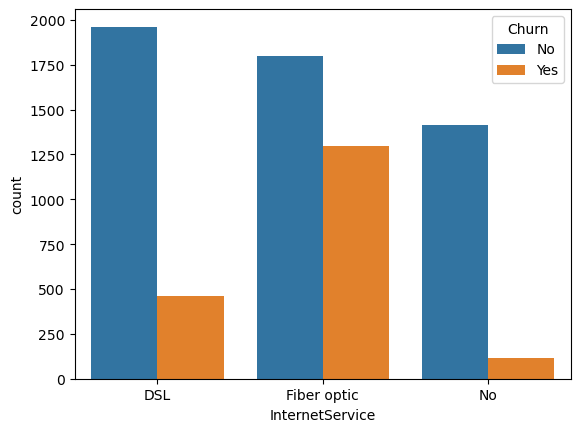

High Churn in Fiber Optics Internet Service 


In [20]:
sns.countplot(data=df,x="InternetService",hue="Churn")
plt.show()
print("High Churn in Fiber Optics Internet Service ")

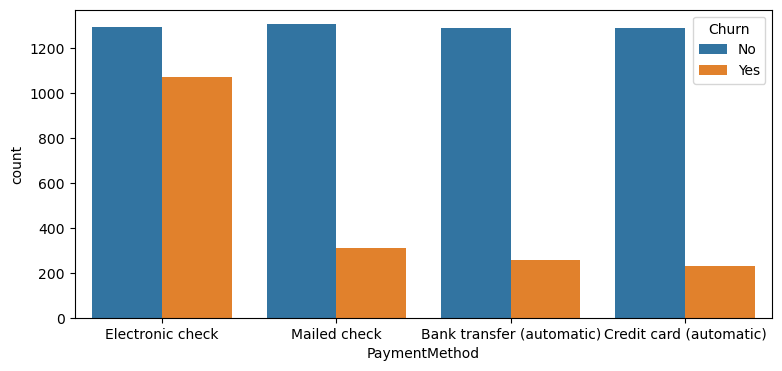

Number of churned customers are more for Electronic Check


In [21]:
plt.figure(figsize=(9,4))
sns.countplot(data=df,x="PaymentMethod",hue="Churn")
plt.show()
print("Number of churned customers are more for Electronic Check")

<AxesSubplot:xlabel='Contract', ylabel='count'>

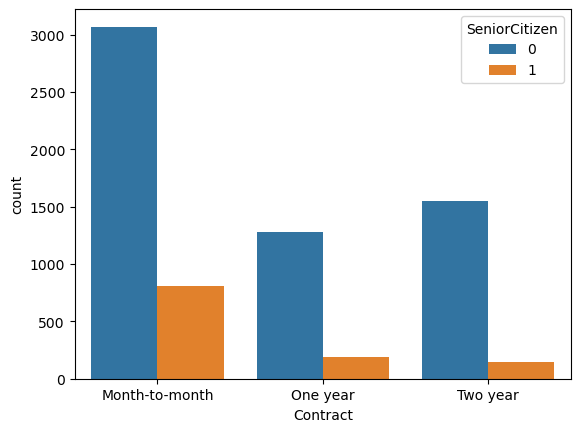

In [22]:
sns.countplot(data=df,x="Contract",hue="SeniorCitizen")

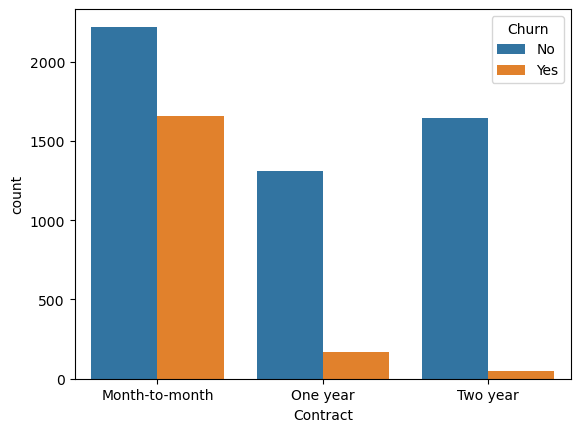

There is a trend that customers who churned were more likely to be on a Month-to-Month contract.


In [23]:
sns.countplot(data=df,x="Contract",hue="Churn")
plt.show()
print("There is a trend that customers who churned were more likely to be on a Month-to-Month contract.")

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

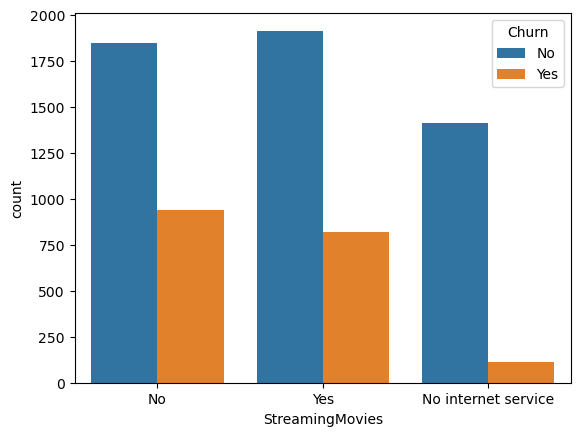

In [24]:
 sns.countplot(data=df,x="StreamingMovies",hue="Churn")

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

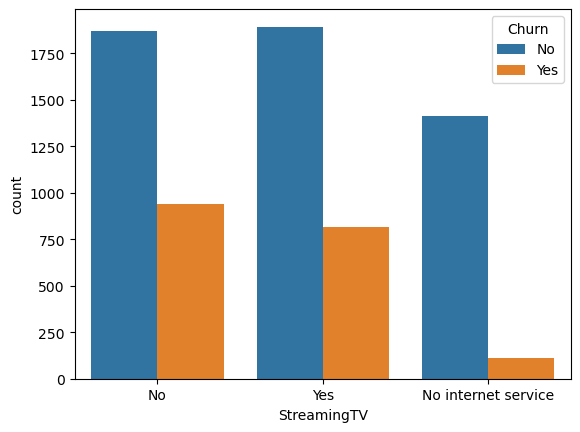

In [25]:
 sns.countplot(data=df,x="StreamingTV",hue="Churn")

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

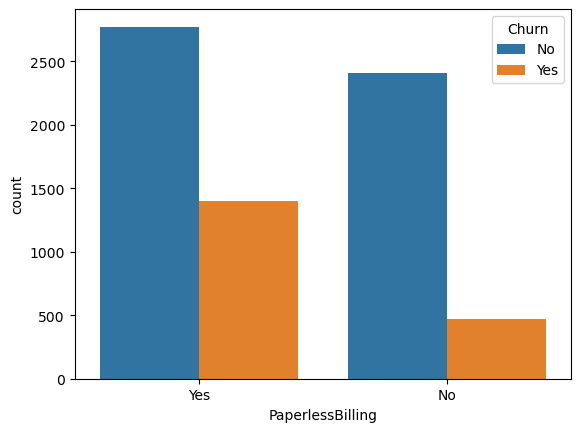

In [26]:
sns.countplot(data=df,x="PaperlessBilling",hue="Churn")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

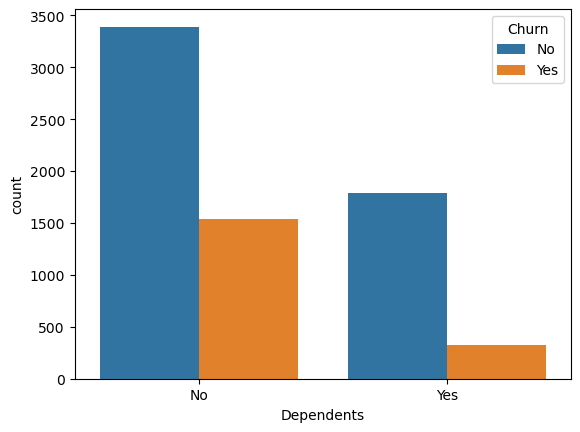

In [27]:
sns.countplot(data=df,x="Dependents",hue="Churn")

## #Feature Engineering

The TotalCharges Feature has numerical values but it was showing dtype as object.

In [28]:
# df["TotalCharges"].astype(float)

In [29]:
df[df['TotalCharges']==' '].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [30]:
list(df['TotalCharges'].values).count(" ")

11

In [31]:
df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],axis=0,inplace=True)

In [32]:
df['TotalCharges'] = df.TotalCharges.astype(float)

In [33]:
df['TotalCharges'].dtype

dtype('float64')

In [34]:
df.drop("customerID",axis=1,inplace=True)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### #Using Ordinal Encoding

In [117]:
df1 = df.copy()

In [118]:
Cat_Feature = df1.select_dtypes(include="object").columns
Cat_Feature

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [119]:
from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder()
df1[Cat_Feature] = oec.fit_transform(df1[Cat_Feature])

In [120]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [121]:
for col in df.select_dtypes(include="object"):
    print(col,":",df[col].unique(),"-"*5,df1[col].unique())
    print("")

gender : ['Female' 'Male'] ----- [0. 1.]

Partner : ['Yes' 'No'] ----- [1. 0.]

Dependents : ['No' 'Yes'] ----- [0. 1.]

PhoneService : ['No' 'Yes'] ----- [0. 1.]

MultipleLines : ['No phone service' 'No' 'Yes'] ----- [1. 0. 2.]

InternetService : ['DSL' 'Fiber optic' 'No'] ----- [0. 1. 2.]

OnlineSecurity : ['No' 'Yes' 'No internet service'] ----- [0. 2. 1.]

OnlineBackup : ['Yes' 'No' 'No internet service'] ----- [2. 0. 1.]

DeviceProtection : ['No' 'Yes' 'No internet service'] ----- [0. 2. 1.]

TechSupport : ['No' 'Yes' 'No internet service'] ----- [0. 2. 1.]

StreamingTV : ['No' 'Yes' 'No internet service'] ----- [0. 2. 1.]

StreamingMovies : ['No' 'Yes' 'No internet service'] ----- [0. 2. 1.]

Contract : ['Month-to-month' 'One year' 'Two year'] ----- [0. 1. 2.]

PaperlessBilling : ['Yes' 'No'] ----- [1. 0.]

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] ----- [2. 3. 0. 1.]

Churn : ['No' 'Yes'] ----- [0. 1.]



In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   float64
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   float64
 3   Dependents        7032 non-null   float64
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   float64
 6   MultipleLines     7032 non-null   float64
 7   InternetService   7032 non-null   float64
 8   OnlineSecurity    7032 non-null   float64
 9   OnlineBackup      7032 non-null   float64
 10  DeviceProtection  7032 non-null   float64
 11  TechSupport       7032 non-null   float64
 12  StreamingTV       7032 non-null   float64
 13  StreamingMovies   7032 non-null   float64
 14  Contract          7032 non-null   float64
 15  PaperlessBilling  7032 non-null   float64
 16  PaymentMethod     7032 non-null   float64


### #Using get_dummies

In [123]:
df2 = df.copy()

In [124]:
df2['Churn'] = df2['Churn'].map({"Yes":1,"No":0})

In [125]:
df2_getDummies = pd.get_dummies(df2,drop_first=True) 

In [126]:
df2_getDummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## #EDA

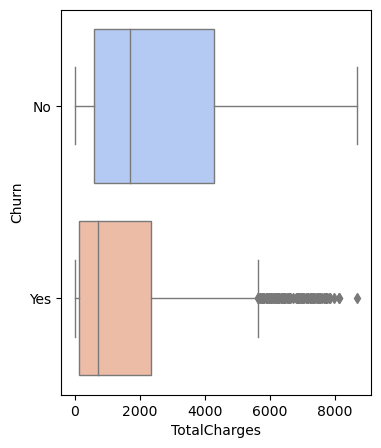

In [127]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,x="TotalCharges",y="Churn",palette="coolwarm",linewidth=1)
plt.show()


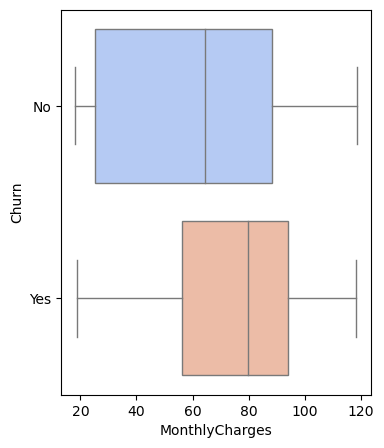

In [128]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,x="MonthlyCharges",y="Churn",palette="coolwarm",linewidth=1)
plt.show()


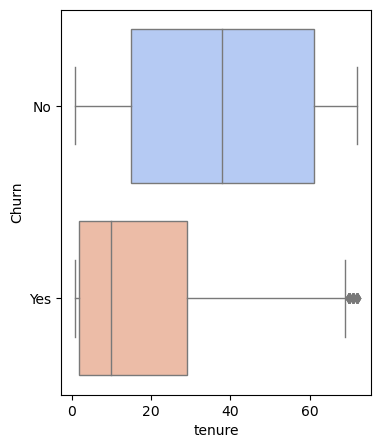

In [129]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,x="tenure",y="Churn",palette="coolwarm",linewidth=1)
plt.show()


In [130]:
con_features = ["tenure","MonthlyCharges","TotalCharges"]

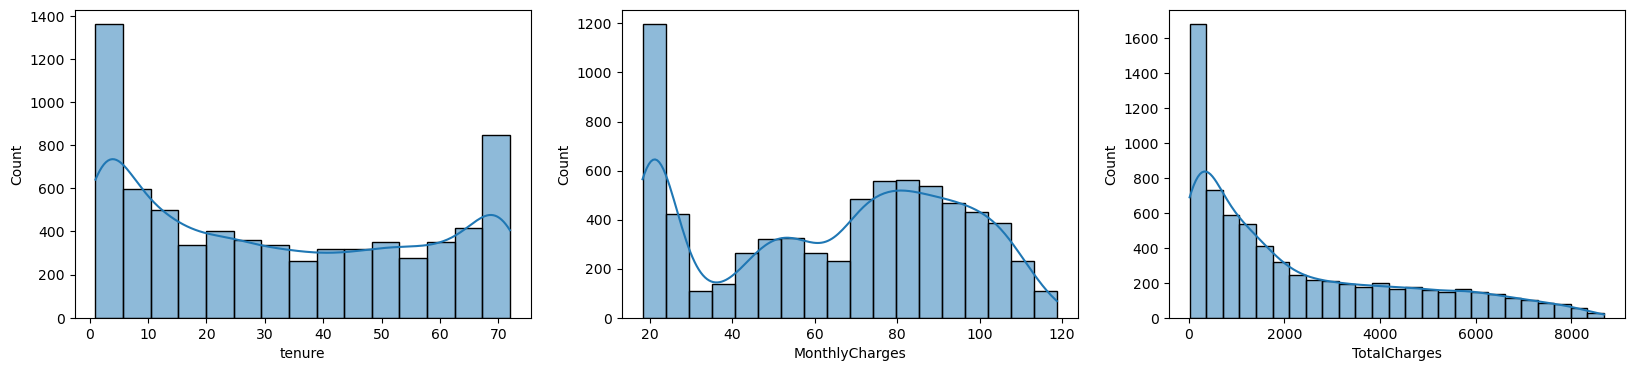

In [131]:
plt.figure(figsize=(20,4))
i=1
for col in con_features:
    plt.subplot(1,3,i)
    sns.histplot(df1[con_features][col],kde=True)
    i+=1 

<AxesSubplot:>

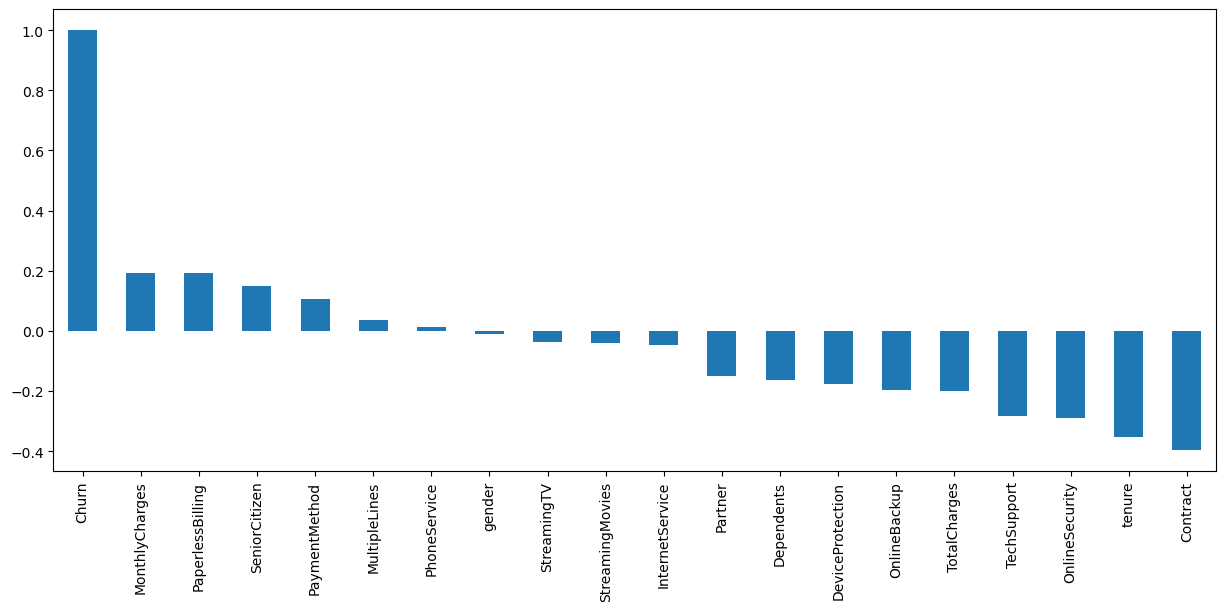

In [132]:
plt.figure(figsize=(15,6))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind="bar")

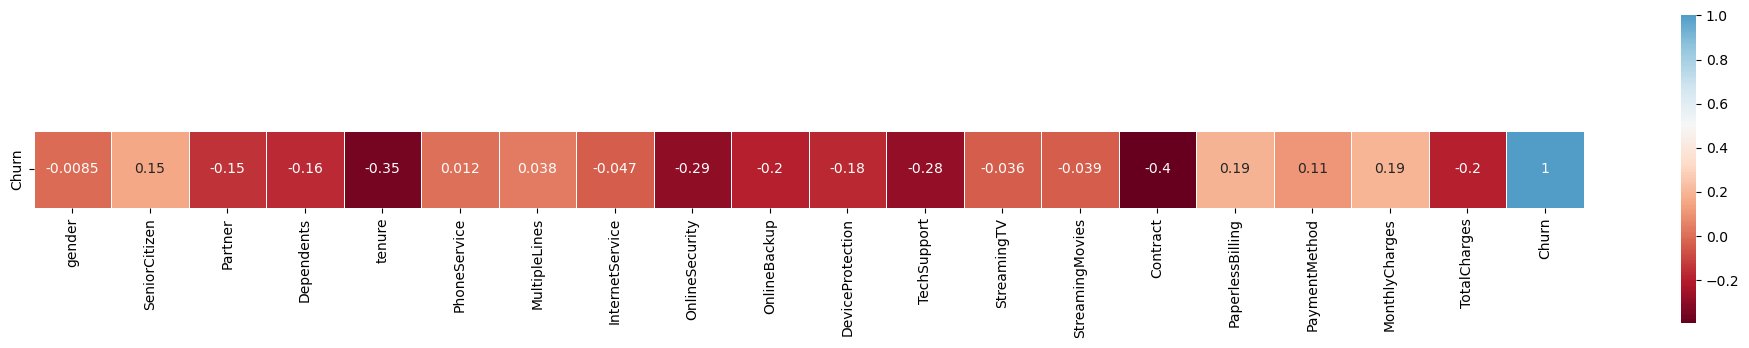

In [133]:
plt.figure(figsize=(25,8), dpi=100)
sns.heatmap(df1.corr()[["Churn"]].T,annot=True, center=0.5, vmax=1, square=True, linewidths=.5,cmap="RdBu", cbar_kws={"shrink": .5})
plt.show()

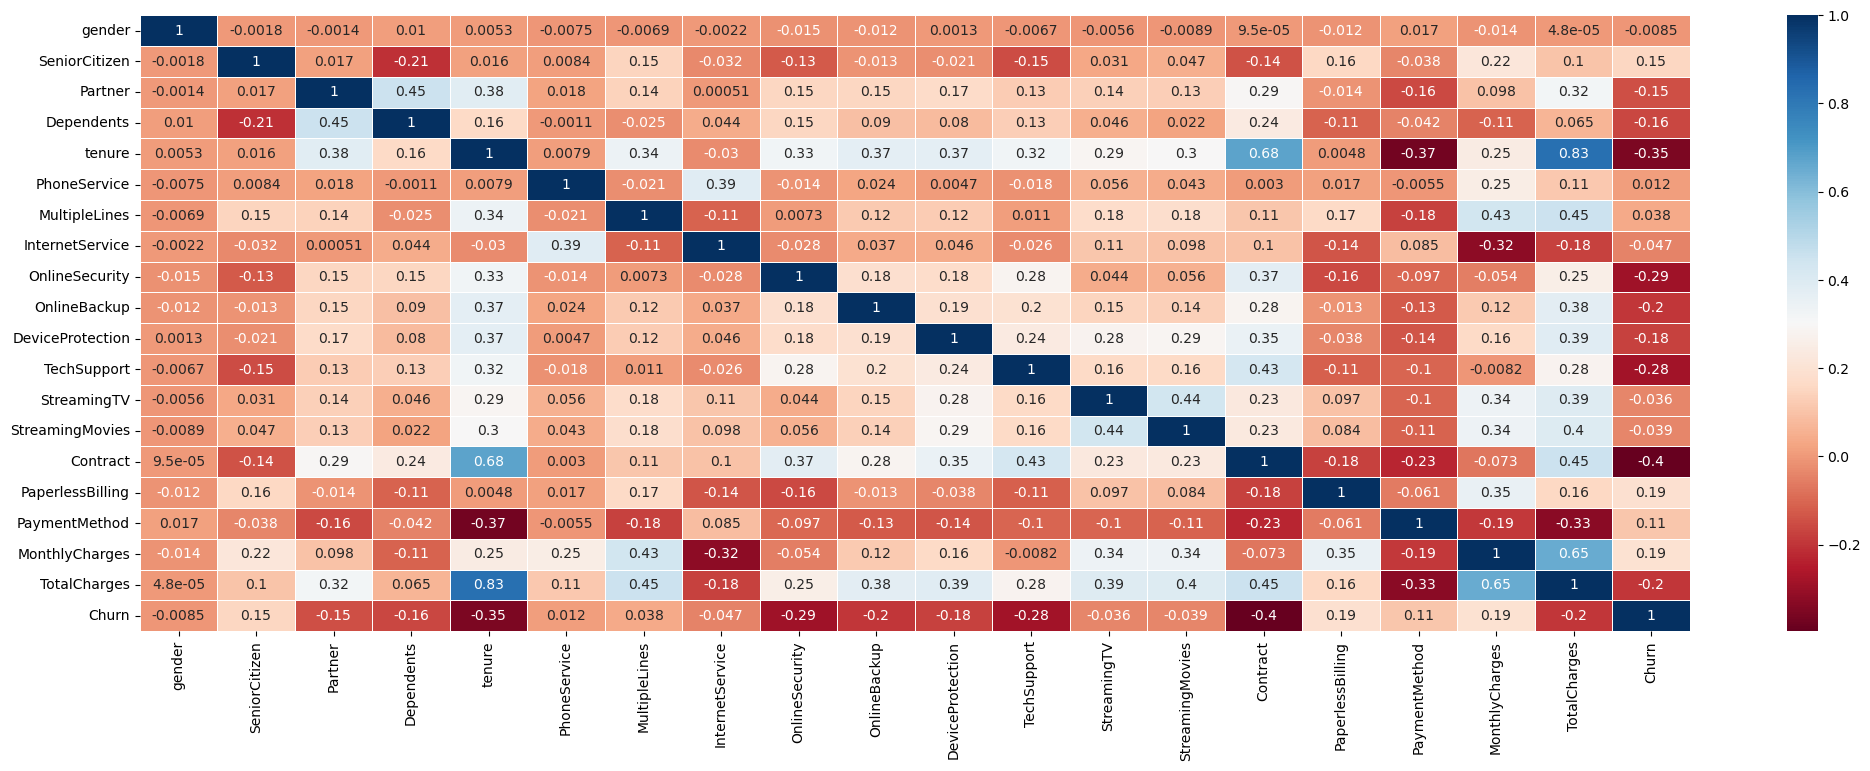

In [134]:
plt.figure(figsize=(25,8), dpi=100)
sns.heatmap(df1.corr(),annot=True,linewidths=.5,cmap="RdBu")
plt.show()

### Min Max Scaler

In [135]:
Scale_feature = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
M_Scaler = MinMaxScaler()
# S_Scaler = StandardScaler()
df1[Scale_feature] = M_Scaler.fit_transform(df1[Scale_feature])


In [136]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.115423,0.001275,0.0
1,1.0,0,0.0,0.0,0.464789,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.385075,0.215867,0.0
2,1.0,0,0.0,0.0,0.014085,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.354229,0.010310,1.0
3,1.0,0,0.0,0.0,0.619718,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.239303,0.210241,0.0
4,0.0,0,0.0,0.0,0.014085,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.521891,0.015330,1.0


### #Spliting Dependent and Independent

In [137]:
X = df1.drop("Churn",axis=1)
y = df1.Churn

In [138]:
# #get dummies data
# X2 = df2_getDummies.drop("Churn",axis=1)
# y2 = df2_getDummies.Churn

### #SMOTE (balancing method)

In [139]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=44)
Xs,ys = smote.fit_resample(X,y)


In [150]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [151]:
ys.value_counts()

0.0    5163
1.0    5163
Name: Churn, dtype: int64

### #Standardization


In [141]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_Scaler = scaler.fit_transform(X)

### #Train_test_Split

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.30, random_state=30)

In [143]:
# X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=33,stratify=df1.Churn)

In [152]:
print(y_train.shape)
print(y_test.shape)

(7228,)
(3098,)


### #Model

In [144]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [145]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [146]:
y_pred = model.predict(X_test)

In [147]:
# accuracy_score(y_test,y_pred)

<span style="color:red;"> The overall model accuracy may also decrease, but this is not a problem: accuracy should not be used as a metric in case of imbalanced data.</span>

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1543
         1.0       0.76      0.82      0.79      1555

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



In [149]:
print(confusion_matrix(y_test,y_pred))
print("")
print("Precision Score : ", precision_score(y_test,y_pred))
print("Recall Score : ", recall_score(y_test,y_pred))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
# print("Accuracy Score : ", f1_score(y_test,y_pred))

[[1138  405]
 [ 277 1278]]

Precision Score :  0.7593582887700535
Recall Score :  0.8218649517684887
Accuracy Score :  0.7798579728857328


### #Logistics Regression

In [67]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [68]:
y2_pred = model2.predict(X_test)

In [69]:
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1543
         1.0       0.75      0.82      0.78      1555

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



In [70]:
print(confusion_matrix(y_test,y2_pred))
print("")
print("Precision Score : ", precision_score(y_test,y2_pred))
print("Recall Score : ", recall_score(y_test,y2_pred))
print("Accuracy Score : ", accuracy_score(y_test,y2_pred))

[[1128  415]
 [ 284 1271]]

Precision Score :  0.7538552787663108
Recall Score :  0.817363344051447
Accuracy Score :  0.7743705616526791


### #Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y3_pred = model3.predict(X_test)

In [74]:
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1543
         1.0       0.75      0.82      0.78      1555

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



In [75]:
print(confusion_matrix(y_test,y3_pred))
print("")
print("Precision Score : ", precision_score(y_test,y3_pred))
print("Recall Score : ", recall_score(y_test,y3_pred))
print("Accuracy Score : ", accuracy_score(y_test,y3_pred))

[[1243  300]
 [ 301 1254]]

Precision Score :  0.806949806949807
Recall Score :  0.8064308681672026
Accuracy Score :  0.8060038734667527


### #Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train,y_train)

GaussianNB()

In [81]:
y4_pred = model4.predict(X_test)

In [82]:
print(classification_report(y_test,y4_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1543
         1.0       0.75      0.82      0.79      1555

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



In [83]:
print(confusion_matrix(y_test,y4_pred))
print("")
print("Precision Score : ", precision_score(y_test,y4_pred))
print("Recall Score : ", recall_score(y_test,y4_pred))
print("Accuracy Score : ", accuracy_score(y_test,y4_pred))

[[1125  418]
 [ 280 1275]]

Precision Score :  0.7531010041346722
Recall Score :  0.819935691318328
Accuracy Score :  0.7746933505487411


### #SVM

In [85]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model5 = SVC(kernel='rbf', degree=2, gamma='auto', C=5)
model5.fit(X_train, y_train)


SVC(C=5, degree=2, gamma='auto')

In [86]:
y5_pred = model5.predict(X_test)

In [87]:
print(classification_report(y_test,y5_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83      1543
         1.0       0.85      0.79      0.82      1555

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



In [88]:
print(confusion_matrix(y_test,y5_pred))
print("")
print("Precision Score : ", precision_score(y_test,y5_pred))
print("Recall Score : ", recall_score(y_test,y5_pred))
print("Accuracy Score : ", accuracy_score(y_test,y5_pred))

[[1332  211]
 [ 327 1228]]

Precision Score :  0.8533703961084086
Recall Score :  0.7897106109324759
Accuracy Score :  0.8263395739186572


### #SVM HyerParameter Tunning

In [1007]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
#               'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
#               'kernel': ['rbf', 'poly', 'linear']} 

# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
# grid.fit(Xs_train, ys_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

# svm_clf = SVC(**best_params)

In [1008]:
# y6_pred = svm_clf.predict(X_test)

In [1009]:
# print(classification_report(y_test,y6_pred))

In [1010]:
# print(confusion_matrix(y_test,y6_pred))
# print("")
# print("Precision Score : ", precision_score(y_test,y6_pred))
# print("Recall Score : ", recall_score(y_test,y6_pred))
# print("Accuracy Score : ", accuracy_score(y_test,y6_pred))

### #Random forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
ranfor_pred = ranfor.predict(X_test)

In [91]:
print(confusion_matrix(y_test,ranfor_pred))
print("")
print("Precision Score : ", precision_score(y_test,ranfor_pred))
print("Recall Score : ", recall_score(y_test,ranfor_pred))
print("Accuracy Score : ", accuracy_score(y_test,ranfor_pred))

[[1357  186]
 [ 270 1285]]

Precision Score :  0.8735554044867437
Recall Score :  0.8263665594855305
Accuracy Score :  0.8528082633957392


### #KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [95]:
kn_pred = kn.predict(X_test)

In [96]:
print(confusion_matrix(y_test,kn_pred))
print("")
print("Precision Score : ", precision_score(y_test,kn_pred))
print("Recall Score : ", recall_score(y_test,kn_pred))
print("Accuracy Score : ", accuracy_score(y_test,kn_pred))

[[1151  392]
 [ 337 1218]]

Precision Score :  0.7565217391304347
Recall Score :  0.7832797427652733
Accuracy Score :  0.7646868947708199


### #GBC

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
Grbc = GradientBoostingClassifier()
Grbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [98]:
Grbc_pred = Grbc.predict(X_test)

In [99]:
print(confusion_matrix(y_test,Grbc_pred))
print("")
print("Precision Score : ", precision_score(y_test,Grbc_pred))
print("Recall Score : ", recall_score(y_test,Grbc_pred))
print("Accuracy Score : ", accuracy_score(y_test,Grbc_pred))

[[1331  212]
 [ 237 1318]]

Precision Score :  0.8614379084967321
Recall Score :  0.847588424437299
Accuracy Score :  0.855067785668173


### #AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [101]:
abc_pred = abc.predict(X_test)

In [102]:
print(confusion_matrix(y_test,abc_pred))
print("")
print("Precision Score : ", precision_score(y_test,abc_pred))
print("Recall Score : ", recall_score(y_test,abc_pred))
print("Accuracy Score : ", accuracy_score(y_test,abc_pred))

[[1297  246]
 [ 225 1330]]

Precision Score :  0.8439086294416244
Recall Score :  0.8553054662379421
Accuracy Score :  0.8479664299548095


### #XGBoosting

In [165]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [166]:
xgb_pred = xgb.predict(X_test)

In [167]:
print(confusion_matrix(y_test,xgb_pred))
print("")
print("Precision Score : ", precision_score(y_test,xgb_pred))
print("Recall Score : ", recall_score(y_test,xgb_pred))
print("Accuracy Score : ", accuracy_score(y_test,xgb_pred))

[[1306  237]
 [ 247 1308]]

Precision Score :  0.8466019417475729
Recall Score :  0.8411575562700965
Accuracy Score :  0.8437701743060039


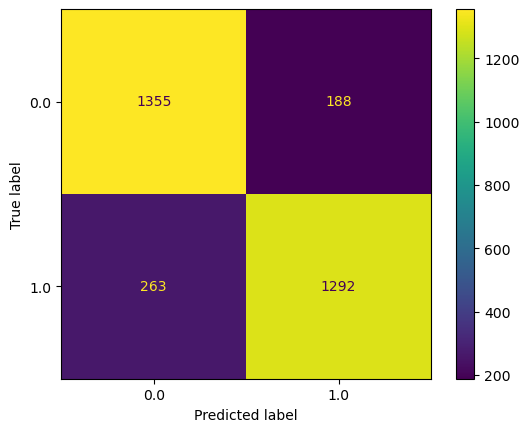

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, xgb_pred , labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [163]:
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    
#     # Classification Report
#     print(classification_report(y_test,classifier.predict(x_test)))
    
#     #
#     p_score1=precision_score(y_test, y_pred1)*100
#     print("precision_score:",p_score1)
#     r_score1=recall_score(y_test, y_pred1,)*100
#     print("recall_score:",r_score1)
    
    print(labels)
    print(cm)
    

[['True Neg\n1427\n46.06%' 'False Pos\n116\n3.74%']
 ['False Neg\n676\n21.82%' 'True Pos\n879\n28.37%']]
[[1427  116]
 [ 676  879]]


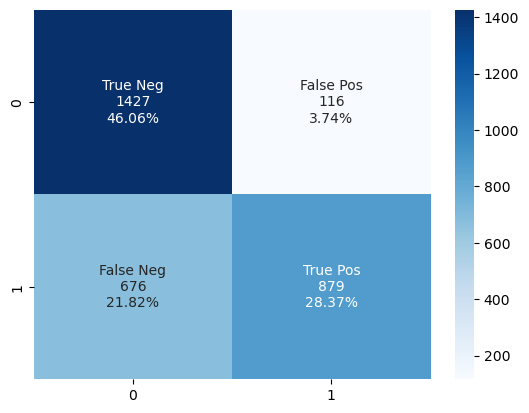

In [164]:
model_evaluation(xgb,X_test,y_test)